In [1]:
## import corresponding python lib
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import TweetTokenizer 
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.corpus import stopwords
from urllib import request
import time
import matplotlib_venn as venn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV

In [2]:
#Load dataset
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

# Data Analyze


In [2]:
#Load dataset -- floydhub
#from textblob import TextBlob
train_data = pd.read_csv("../input/toxic_comment_dataset/train.csv")
test_data = pd.read_csv("../input/toxic_comment_dataset/test.csv")
class_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [6]:
#Display columns of train data
train_data.tail(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [22]:
#Show the count, data missing status of data set
print('Count of train_data:', train_data.shape[0])
print('The ratio between train_data and test_data:', train_data.shape[0]/test_data.shape[0])
print('Data missing status:')
print('Train data set:')
missing_check = train_data.isnull().sum()
print(missing_check)
missing_check = test_data.isnull().sum()
print(missing_check)

##add Clean column for train_data
rowN = train_data.iloc[:,2:].sum(axis=1)
train_data['clean'] =(rowN == 0)
print('Count of clean comments:', train_data['clean'].sum())

Count of train_data: 159571
The ratio between train_data and test_data: 1.0418309785589304
Data missing status:
Train data set:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
id              0
comment_text    0
dtype: int64
Count of clean comments: 143346


Text(0.5, 0, 'Type')

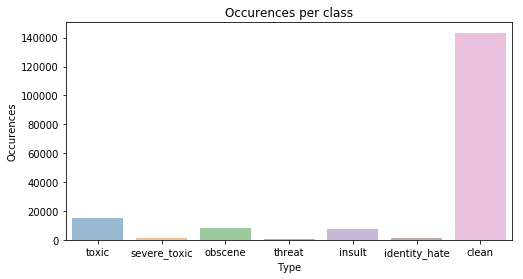

In [25]:

x = train_data.iloc[:,2:].sum()
plt.figure(figsize=(8,4))
ax = sbn.barplot(x.index, x.values, alpha = 0.5)
plt.title("Occurences per class")
plt.ylabel("Occurences")
plt.xlabel("Type")
#print("The ratio between clean and all comment:" train_data['clean'].sum()/train_data.shape[0])

分析结论：从上述数据显示，训练数据和测试数据数据量相当，训练集和测试集均没有数据缺失。数据分布不均衡，大量的comment属于clean data.

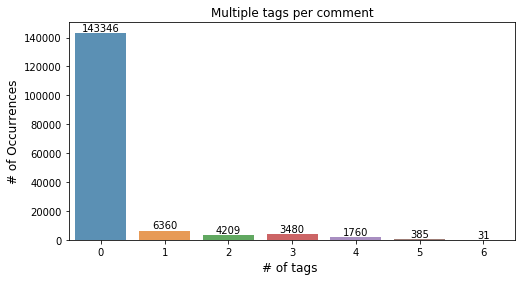

In [7]:
#multiple tags for comments
rowsums=train_data.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sbn.barplot(x.index, x.values, alpha=0.8)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

上图显示一条评论可能对应多种分类标签的情况，单纯只对应一个标签的评论只有6360条。

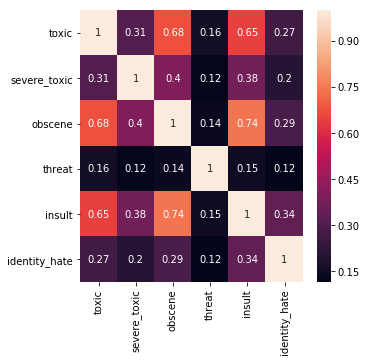

In [31]:
##Display hotmap of train_data
temp_df = train_data.iloc[:,2:-1]
corr = temp_df.corr(method="spearman")
plt.figure(figsize=(5,5))
sbn.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

热力图显示，insult和obscene的评论相关性最高，其次是insult/obscene的评论与toxic的相关性较高。

In [41]:
print(train_data[train_data.obscene == 1].iloc[1,1])

You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [42]:
print(train_data[train_data.toxic == 1].iloc[1,1])

Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


In [43]:
print(train_data[train_data.severe_toxic == 1].iloc[1,1])

Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


In [60]:
print(train_data[train_data.threat == 1].iloc[147,1])

Go and hang yourself!


In [55]:
print(train_data[train_data.insult == 1].iloc[5,1])

All of my edits are good.  Cunts like you who revert good edits because you're too stupid to understand how to write well , and then revert other edits just because you've decided to bear a playground grudge, are the problem.  Maybe one day you'll realise the damage you did to a noble project.  201.215.187.159


In [54]:
print(train_data[train_data.identity_hate == 1].iloc[200,1])

I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck niggas! I fuck nig

从随机查看的数据情况来看，数据长短不一，内容含有一些与情感无关的特殊符号或者号码等，也存在大量的复制粘贴重复的语句。

## Data processing

In [3]:
merge_data = pd.concat([train_data.iloc[:,0:2], test_data.iloc[:,0:2]])
df = merge_data.reset_index(drop = True)

In [4]:
#https://drive.google.com/file/d/0B1yuv8YaUVlZZ1RzMFJmc1ZsQmM/view
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

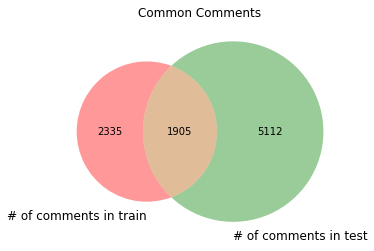

In [5]:
train_word_list = list(set([a for b in train_data.comment_text.tolist() for a in b]))
test_word_list = list(set([a for b in test_data.comment_text.tolist() for a in b]))

train_cmt_list = train_data.comment_text.tolist()
test_cmt_list = test_data.comment_text.tolist()

common_word_list = list(set(train_word_list).intersection(test_word_list))
plt.title("Common Comments")
venn.venn2(subsets=(len(train_word_list),len(test_word_list),len(common_word_list)),set_labels=("# of comments in train","# of comments in test"))
plt.show()

In [5]:
# Reduction speech, e.g.:  laughing --> laugh
lem = WordNetLemmatizer()
# TweetTokenizer 
token = TweetTokenizer(strip_handles=True, reduce_len = True)

nltk.download('stopwords')
nltk.download('wordnet')
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
print(eng_stopwords)

{'this', 'from', 'under', 'are', 'does', 'their', 'who', 'or', 'below', 'up', 'were', "mightn't", 'was', "don't", "didn't", 'd', 'only', 'herself', 'won', 'in', 'him', 'for', 'mightn', 'shan', 'which', 'while', 'few', 'itself', 'his', 'such', 'mustn', 'i', 'be', 'own', "wouldn't", 'yourselves', 'all', 'no', 'whom', 'those', 'she', 'and', 'hadn', 'doing', 'll', 'our', 'with', 'y', "should've", "she's", 'now', "haven't", 'ain', 'over', 'when', 'your', 'out', 'other', 'off', 'needn', 'down', 'ourselves', 'there', 'each', 'yourself', 'nor', 'then', 'wouldn', 'is', 'but', 'through', 'before', "shouldn't", 'very', 'that', "hasn't", "hadn't", 'should', 'wasn', 'most', 'me', 'these', 'weren', 'any', 'couldn', 'above', 'being', 'between', 'it', 'yours', 'hers', 'will', 'a', "you've", 'the', 'again', 'where', 'both', 'have', 'if', 'isn', 'more', 'of', 're', 'how', 'do', 'not', 'further', 'about', 'at', 'ours', 'haven', 'her', 'so', "you're", "couldn't", 'didn', 'because', "shan't", 'same', 'agai

In [6]:

def clean(cmt):
    """
    It will receive comments and return clean word-list
    """
    ## delete ip,uername,url change upper to lower
    cmt = cmt.lower()
    cmt = re.sub("\n", " ", cmt)
    cmt = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}", " <IP> ", cmt)
    cmt = re.sub("\w+([-+.]\w+)*@\w+([-.]\w+)*\.\w+([-.]\w+)*", " <email> ", cmt)
    cmt = re.sub("\d{4}-\d{1,2}-\d{1,2}", " <date> ", cmt)
    cmt = re.sub("\[\[.*\]", " ", cmt)
    #replace url with <url>
    cmt = re.sub("[a-zA-z]+://[^\s]*", " <url> ", cmt)
    cmt = re.sub("^\d{15}|\d{18}$", " ", cmt)
    # replace some special note
    cmt = re.sub("[@%&',;=?$\x22]+", " ", cmt)
    #re.match("([a-zA-Z])(\1){2,}", "", cmt)
    
    #split sentences into words
    words = token.tokenize(cmt)
    
    words = [appos[word] if word in appos else word for word in words]
    words =[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_smt = " ".join(words)
    
    return clean_smt

In [7]:
##Example of Corpus cleaning 
corpus = merge_data.comment_text
print('Before clean:', corpus.iloc[1314])
print('========Devided line==========')
print("After clean:", clean(corpus.iloc[1314]))


Before clean: i was telled it woul.d be a single don.t merge - pzzschool
========Devided line==========
After clean: tell woul . single . merge - pzzschool


In [8]:
#Corpus clean
time_startclean = time.time()
clean_corpus = corpus.apply(lambda x :clean(x))
time_endclean = time.time()

print('Take ', time_endclean - time_startclean, ' seconds to clean')

Take  229.02909994125366  seconds to clean


## Logistic Regression

In [9]:
#vectorize by word
maxFeatures = 30000
time_vec_start = time.time()
tfidfV = TfidfVectorizer(min_df = 5, max_features = maxFeatures, 
                        strip_accents ='unicode', analyzer='word', ngram_range =(1,1),
                        use_idf=1,smooth_idf =1, sublinear_tf=1,
                        stop_words='english')
tfidfV.fit(clean_corpus)
features = np.array(tfidfV.get_feature_names())
train_bigrams = tfidfV.transform(clean_corpus.iloc[:train_data.shape[0]])
test_bigrams = tfidfV.transform(clean_corpus.iloc[train_data.shape[0]:])

time_vec_end = time.time()
print('Take ', time_vec_end - time_vec_start, 'seconds to vectorize')

Take  29.942659854888916 seconds to vectorize


In [10]:
#vectorize by char
time_vec_start = time.time()
maxFeatures = 30000
tfidfV_char = TfidfVectorizer(min_df = 50, max_features = maxFeatures, 
                        strip_accents ='unicode', analyzer='char', ngram_range =(2,5),
                        use_idf=1,smooth_idf =1, sublinear_tf=1,
                        stop_words='english')
tfidfV_char.fit(clean_corpus)
features_char = np.array(tfidfV_char.get_feature_names())
train_char = tfidfV_char.transform(clean_corpus.iloc[:train_data.shape[0]])
test_char = tfidfV_char.transform(clean_corpus.iloc[train_data.shape[0]:])
time_vec_end = time.time()
print('Take ', time_vec_end - time_vec_start, 'seconds to vectorize by char.')

Take  477.20126366615295 seconds to vectorize by char.


In [11]:
train_word_char = hstack([train_char, train_bigrams])
test_word_char = hstack([test_char, test_bigrams]) 

scores = []
submission = pd.DataFrame.from_dict({'id': test_data['id']})
class_names = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

for class_name in class_names:
    train_target = train_data[class_name]
    classifier = LogisticRegression(C=0.5, solver='sag')

    #cv_score = np.mean(cross_val_score(classifier, train_bigrams, train_target, cv=20, scoring='roc_auc'))
    #cv_score = np.mean(cross_val_score(classifier, train_char, train_target, cv=5, scoring='roc_auc'))
    cv_score = np.mean(cross_val_score(classifier, train_word_char, train_target, cv=20, scoring='roc_auc'))
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))

    #classifier.fit(train_bigrams, train_target)
    #submission[class_name] = classifier.predict_proba(test_bigrams)[:, 1]
    #classifier.fit(train_char, train_target)
    #submission[class_name] = classifier.predict_proba(test_char)[:, 1]
    classifier.fit(train_word_char, train_target)
    submission[class_name] = classifier.predict_proba(test_word_char)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

submission.to_csv('submission.csv', index=False)

CV score for class toxic is 0.9770128427661546
CV score for class severe_toxic is 0.9885307768238081
CV score for class obscene is 0.9910237086949085
CV score for class threat is 0.9843439683910699
CV score for class insult is 0.9818408391068809
CV score for class identity_hate is 0.9831813816251127
Total CV score is 0.9843222529013226


In [15]:
sub_test_data = pd.read_csv("submission.csv")
aa = sub_test_data.sort_values(by="toxic" , ascending=True)
aa.tail(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
137113,e5254ce9fabd9893,1.0,0.972202,1.0,0.086464,0.999999,0.540957
39402,41600a159afb4a20,1.0,0.943378,1.0,0.070153,0.999989,0.406263
122641,cccdd198baa36464,1.0,0.956472,1.0,0.203682,0.999978,0.666133
126357,d320f8749c6d9820,1.0,0.971767,1.0,0.199575,0.999842,0.277631
141347,ec4774caac6adef4,1.0,0.937374,1.0,0.083501,0.999960,0.489629
135375,e248b2a56473f1a3,1.0,0.961801,1.0,0.592078,0.999964,0.900754
71810,77a740cd70e2959f,1.0,0.959117,1.0,0.058676,0.999693,0.145779
69838,74412dadacac9976,1.0,0.902598,1.0,0.117471,0.999799,0.285364
146815,f56c9f2f5c599ec2,1.0,0.988230,1.0,0.159440,0.999997,0.616608
72990,799638b93f93a0c4,1.0,0.990347,1.0,0.561841,0.999989,0.961152


## Deep learning -- GRU, pretrained word vector Fasttext/GloVe/Glove-twitter

In [9]:
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate,Dropout,Flatten,Lambda,Conv1D,PReLU,concatenate
from keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, BatchNormalization,MaxPooling1D,LSTM,TimeDistributed
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras_tqdm import TQDMCallback
from keras import backend as K
from keras.regularizers import l2
from sklearn.model_selection import KFold, train_test_split
from collections import Counter
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras import optimizers

import os, gc, warnings, gensim, pickle
os.environ['OMP_NUM_THREADS'] = '4'
warnings.filterwarnings('ignore')
from unidecode import unidecode

randomC = 42
np.random.seed(randomC)
eng_stopwords = set(stopwords.words("english"))

Using TensorFlow backend.
C:\Users\Dell\AppData\Local\conda\conda\envs\toxic-env\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [11]:
#Corpus clean
time_startclean = time.time()
train_data['clean_text'] = train_data['comment_text'].apply(lambda x: clean(str(x)))
test_data['clean_text'] = test_data['comment_text'].apply(lambda x: clean(str(x)))
time_endclean = time.time()

print('Take ', time_endclean - time_startclean, ' seconds to clean')

X_train = train_data['clean_text'].fillna("something").values
y_train = train_data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
X_test = test_data['clean_text'].fillna("something").values

Take  228.1640501022339  seconds to clean


### Add features for train/test dataset with length, number of unique words etc.

In [12]:
def add_features(df):
    
    df['comment_text'] = df['comment_text'].apply(lambda x:str(x))
    df['total_length'] = df['comment_text'].apply(len)
    df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    df['num_words'] = df.comment_text.str.count('\S+')
    df['num_unique_words'] = df['comment_text'].apply(lambda comment: len(set(w for w in comment.split())))
    df['words_vs_unique'] = df['num_unique_words'] / df['num_words']  

    return df

train_data = add_features(train_data)
test_data = add_features(test_data)

features = train_data[['caps_vs_length', 'words_vs_unique']].fillna(0)
test_features = test_data[['caps_vs_length', 'words_vs_unique']].fillna(0)

ss = StandardScaler()
ss.fit(np.vstack((features, test_features)))
features = ss.transform(features)
test_features = ss.transform(test_features)

In [15]:
max_features = 20000
maxlen = 150

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train) + list(X_test))
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)

x_train = pad_sequences(X_train_sequence, maxlen=maxlen)
x_test = pad_sequences(X_test_sequence, maxlen=maxlen)
print(len(tokenizer.word_index))

319004


### Extract weight matrix of pre-trained word vector [ fasttext, glove/glove-twitter ] 

In [ ]:
Embed_fast_text = "../input/fasttext_crawl_300d_2m/crawl-300d-2M.vec"
Embed_glove = "../input/decanlp_glove_840b_300d/glove.840B.300d.txt"
Embed_tw = "../input/glove/glove.twitter.27B.200d.txt"

In [16]:
Embed_fast_text = "data/crawl-300d-2M.vec"
Embed_glove = "data/glove.840B.300d.txt"
Embed_tw = "data/glove.twitter.27B.200d.txt"

In [17]:
def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')
embeddings_index_ft = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(Embed_fast_text,encoding='utf-8'))
embeddings_index_tw = dict(get_coefs(*o.strip().split()) for o in open(Embed_tw,encoding='utf-8'))


In [ ]:
#For glove 300d pretrained vector -- backup

def get_embed_index(file):
    embed_index = {}
    f = open(file, encoding='utf-8')
    for line in f:
        #print(line)
        values = line.split()
        word = ' '.join(values[:-300])
        #print(word)
        coefs = np.asarray(values[-300:], dtype='float32')
        embed_index[word] = coefs
    f.close()
    return embed_index

embeddings_index_glove = get_embed_index(Embed_glove);

In [18]:
# This code is  based on: Spellchecker using Word2vec by CPMP
# https://www.kaggle.com/cpmpml/spell-checker-using-word2vec
spell_model = gensim.models.KeyedVectors.load_word2vec_format(Embed_fast_text)

words = spell_model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

def words(text): return re.findall(r'\w+', text.lower())

def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def singlify(word):
    return "".join([letter for i,letter in enumerate(word) if i == 0 or letter != word[i-1]])

In [19]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words,501))# fasttext 300d + twitter 200d

something_tw = embeddings_index_tw.get("something")
#something_tw = embeddings_index_glove.get("something")
something_ft = embeddings_index_ft.get("something")

something = np.zeros((501,))
something[:300,] = something_ft
something[300:500,] = something_tw
something[500,] = 0

def all_caps(word):
    return len(word) > 1 and word.isupper()

def embed_word(embedding_matrix,i,word):
    embedding_vector_ft = embeddings_index_ft.get(word)
    if embedding_vector_ft is not None: 
        if all_caps(word):
            last_value = np.array([1])
        else:
            last_value = np.array([0])
        embedding_matrix[i,:300] = embedding_vector_ft
        embedding_matrix[i,500] = last_value
        embedding_vector_tw = embeddings_index_tw.get(word)
        if embedding_vector_tw is not None:
            embedding_matrix[i,300:500] = embedding_vector_tw

            
# Fasttext vector is used by itself if there is no glove vector but not the other way around.
for word, i in word_index.items():
    
    if i >= max_features: continue
        
    if embeddings_index_ft.get(word) is not None:
        embed_word(embedding_matrix,i,word)
    else:
        if len(word) > 20:
            embedding_matrix[i] = something
        else:
            word2 = correction(word)
            if embeddings_index_ft.get(word2) is not None:
                embed_word(embedding_matrix,i,word2)
            else:
                word2 = correction(singlify(word))
                if embeddings_index_ft.get(word2) is not None:
                    embed_word(embedding_matrix,i,word2)
                else:
                    embedding_matrix[i] = something     

In [20]:
## calculate AUC ,simulate early stop & record heighest score

class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data
        self.max_score = 0
        self.not_better_count = 0

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=1)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))
            if (score > self.max_score):
                print("*** New High Score (previous: %.6f) \n" % self.max_score)
                model.save_weights("best_weights.h5")
                self.max_score=score
                self.not_better_count = 0
            else:
                self.not_better_count += 1
                if self.not_better_count > 4:
                    print("Epoch %05d: early stopping, high score = %.6f" % (epoch,self.max_score))
                    self.model.stop_training = True

### 实验一 不使用预训练词向量

In [15]:
def get_model_0():
    #functional model
    inp = Input(shape=(maxlen,))
    nb_words = min(maxFeatures, len(word_index))
    f = Embedding(input_dim = nb_words, output_dim = outDim)(inp)
    #x = concatenate([f, g])
    
    x = SpatialDropout1D(0.2)(f)
    x = Bidirectional(GRU(64, return_sequences=True))(x)
    x = SpatialDropout1D(0.1)(x)
    x = Bidirectional(GRU(32, return_sequences=True))(x)
    #x = Attention(MAX_SEQUENCE_LENGTH)(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    #x = Dense(128, activation='relu')(conc)
    #x = TimeDistributed(Dense(64, activation='tanh'))(conc)
    x = Dense(64, activation='relu')(conc)
    x = Dense(32, activation='relu')(x)
    outp = Dense(6, activation="sigmoid")(x)

    model = Model(inputs=inp, outputs=outp)
    model.summary()
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

## 实验二 预训练词向量+bigru+conv1D+PRelu 

In [14]:
def get_model(n_recurrent=50, n_filters=50, dropout_rate=0.2, l2_penalty=0.0001):
    K.clear_session()

    def conc_pooling(x):
        x_avg = GlobalAveragePooling1D()(x)
        x_max = GlobalMaxPooling1D()(x)
        return concatenate([x_avg, x_max])

    inputs = Input(shape=(maxlen,))
    nb_words = min(maxFeatures, len(word_index))
    
    emb = Embedding(nb_words, outDim, 
                    weights=[embedding_matix_f], trainable=False)(inputs)
    x0 = SpatialDropout1D(dropout_rate)(emb)
    
    x0 = Bidirectional(GRU(n_recurrent, return_sequences=True,
                 kernel_regularizer=l2(l2_penalty),
                 recurrent_regularizer=l2(l2_penalty)))(x0)
    
    x0 = Conv1D(n_filters, kernel_size=2)(x0)
    x0 = PReLU()(x0)
    x0 = conc_pooling(x0)

    outputs = Dense(6, activation='sigmoid')(x0)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='nadam')
    return model

## 实验三 两个实验二的模型叠加（预训练词向量+BIGRU+Conv1D+PReLU）

In [17]:
def get_model_2(n_recurrent=50, n_filters=50, dropout_rate=0.2, l2_penalty=0.0001):
    K.clear_session()

    def conc_pooling(x):
        #x_att = AttentionWithContext()(x)
        x_avg = GlobalAveragePooling1D()(x)
        x_max = GlobalMaxPooling1D()(x)
        #return concatenate([x_att, x_avg, x_max])
        return concatenate([x_avg, x_max])

    inputs = Input(shape=(maxlen,))
    nb_words = min(maxFeatures, len(word_index))
    #print('Features: ', maxFeatures, '...', len(word_index))
    
    emb = Embedding(nb_words, outDim, 
                    weights=[embedding_matix_f], trainable=False)(inputs)
    """
    emb_g = Embedding(nb_words, outDim, 
                    weights=[embedding_matix_g], trainable=False)(inputs)
    """
    
    # model 0
    x0 = SpatialDropout1D(dropout_rate)(emb)
    
    x0 = Bidirectional(GRU(n_recurrent, return_sequences=True,
                 kernel_regularizer=l2(l2_penalty),
                 recurrent_regularizer=l2(l2_penalty)))(x0)
    
    x0 = Conv1D(n_filters, kernel_size=3)(x0)
    x0 = PReLU()(x0)
    x0 = conc_pooling(x0)


    # model 1
    x1 = SpatialDropout1D(dropout_rate)(emb)
    x1 = Bidirectional(GRU(2*n_recurrent, return_sequences=True,
                 kernel_regularizer=l2(l2_penalty),
                 recurrent_regularizer=l2(l2_penalty)))(x1)
    x1 = Conv1D(2*n_filters, kernel_size=2)(x1)
    x1 = PReLU()(x1)
    x1 = conc_pooling(x1)

    # combine it all
    x = concatenate([x0, x1])
    outputs = Dense(6, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='nadam')
    return model

In [18]:
checkpointer = ModelCheckpoint(filepath='save_models/weights.best.02.hdf5', 
                               verbose=2, save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_loss', patience = 5)

embed_model = get_model_2(n_recurrent=80, 
                        n_filters=95, 
                        dropout_rate=0.1405, 
                        l2_penalty=0.0001)

In [ ]:
# Verbosity mode: 0 = silent, 1 = # progress bar, 2 = one line per epoch.
import sys
sys.stdout = open('toxic_comment_training.txt', 'w')
time_fit_start = time.time()
history = embed_model.fit(d_train, l_train, validation_data=(d_valid, l_valid), epochs=120, batch_size=35, callbacks=[checkpointer, earlyStopping], verbose=2)
sys.stdout = sys.__stdout__
time_fit_end = time.time()
print("It costs ", time_fit_end - time_fit_start, "to train and test!")

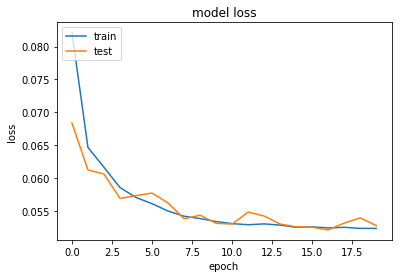

In [35]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline 
"""
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
"""
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

以上实验，效果最好的是实验三，最终AUC的值能达到0.9848左右，目前还没调参达到更高的AUC的值。从结果上看也没有过拟合或者欠拟合。

### 实验四 embbedding 使用的(concatenate fasttext glove twitter)
### Embbedding+dropout+bigru+bigru+AveragePooling+MaxPolling+Dense

In [21]:
def get_model_5(features,cv=1.,num_filters=80,dropout=0.65,embed_size=501):
    features_input = Input(shape=(features.shape[1],))
    inp = Input(shape=(maxlen, ))
    
    # concatenated fasttext and glove twitter embeddings.
    x = Embedding(max_features, embed_size, weights=[embedding_matrix], trainable=False)(inp)
    
    x = SpatialDropout1D(dropout)(x)
    
    x = Bidirectional(GRU(num_filters, return_sequences=True))(x)

    x, x_h, x_c = Bidirectional(GRU(num_filters, return_sequences=True, return_state = True))(x)  
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    # concatenation of the last state, maximum pool, average pool and 
    # two features: "Unique words rate" and "Rate of all-caps words"    
    x = concatenate([avg_pool, x_h, max_pool,features_input])

    outp = Dense(6, activation="sigmoid")(x)

    model = Model(inputs=[inp,features_input], outputs=outp)
    adam = optimizers.adam(clipvalue=cv)
    model.compile(loss='binary_crossentropy',
                  optimizer=adam,
                  metrics=['accuracy'])
    return model

In [23]:
model = get_model_5(features)
print(model.summary())

import cv2                
import matplotlib.pyplot as plt 
from keras.callbacks import ModelCheckpoint
%matplotlib inline 

def paintLoss(history):
    print(history.history.keys())
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 150, 501)     10020000    input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 150, 501)     0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 150, 160)     279360      spatial_dropout1d_1[0][0]        
__________________________________________________________________________________________________
bidirectio

In [ ]:
batch_size = 64
epochs = 20
gc.collect()
K.clear_session()

num_folds = 6 #number of folds

predict = np.zeros((test_data.shape[0],6))
scores = []
oof_predict = np.zeros((train_data.shape[0],6))

kf = KFold(n_splits=num_folds, shuffle=True, random_state=randomC)

for train_index, test_index in kf.split(x_train):
    
    kfold_y_train,kfold_y_test = y_train[train_index], y_train[test_index]
    kfold_X_train = x_train[train_index]
    kfold_X_features = features[train_index]
    kfold_X_valid = x_train[test_index]
    kfold_X_valid_features = features[test_index] 
    
    gc.collect()
    K.clear_session()
    
    model = get_model_5(features)
    
    ra_val = RocAucEvaluation(validation_data=([kfold_X_valid,kfold_X_valid_features], kfold_y_test), interval = 1)
    
    history = model.fit([kfold_X_train,kfold_X_features], kfold_y_train, batch_size=batch_size, epochs=epochs, verbose=2,
             callbacks = [ra_val])
    gc.collect()
    
    model.load_weights("best_weights.h5")
    
    predict += model.predict([x_test,test_features], batch_size=batch_size,verbose=1) / num_folds
    
    gc.collect()
    # uncomment for out of fold predictions
    oof_predict[test_index] = model.predict([kfold_X_valid, kfold_X_valid_features],batch_size=batch_size, verbose=2)
    cv_score = roc_auc_score(kfold_y_test, oof_predict[test_index])
    
    scores.append(cv_score)
    print('score: ',cv_score)
    paintLoss(history)

print("The End.")
 
sample_submission = pd.read_csv("data/sample_submission.csv")
sample_submission[class_names] = predict
sample_submission.to_csv('test_submission_model5.csv',index=False)


Epoch 1/20
